In [1]:
import requests
import networkx as nx
import pandas as pd

In [2]:
#get content in documents 
def get_content(url):
    r = requests.get(url)
    content = r.text
    return content

In [3]:
class Vertice:
    #vertice constructor
    def __init__(self, name):
        self.name = name 
        self.edges = []
        self.visited = False 
        
    #adding an edge 
    def add_edge(self, vertice):
        self.edges.append(vertice)
    
    #show the vertice 
    def __repr__(self):
        return f'{self.name}'
    

In [4]:
class Graph:
    #initialize the graph
    def __init__(self):
        self.vertices = {}
        
        
    #adding a vertice
    def add_vertice(self, vertice):
        self.vertices[vertice] = Vertice(vertice)
        
        
    #creating an edge 
    def add_edge(self, vert1, vert2):
        vertice1 = self.vertices[vert1]
        vertice2 = self.vertices[vert2]
        vertice1.add_edge(vertice2)
        vertice2.add_edge(vertice1)
        
    #bfs search for graph
    def bfs(self, vertice):
        queue = []
        queue.append(self.vertices[vertice])
        
        while queue:
            vertice = queue.pop()
            
            for vert in vertice.edges:
                if vert.visited == False:
                    queue.append(vert)
                    vert.visited = True

        
    #show the adjacency list
    def __repr__(self):
        for _, vertice in self.vertices.items():
            print(f'{vertice.name}: {vertice.edges}')
        return ''

In [5]:
#show the graph 
def show(vertices, edges):
    G = nx.Graph()
    G.add_nodes_from(vertices)
        
    for edge in edges:
        G.add_edge(edge[0], edge[1])
        
    nx.draw(G, with_labels=True)

In [6]:
def test(url):
    #extracting data from url
    text = get_content(url)
    text = text.split('\r\n')
    text = text[1:]
    
    #getting vertices and edges from url text
    vertices = []
    edges = []
    for relation in text:
        list_ = relation.split(' ')
        vertices.append(list_[0])
        vertices.append(list_[2])
        edge = [list_[0], list_[2]]
        edges.append(edge)
    vertices = list(dict.fromkeys(vertices))
    
    #initializating the graph
    graph = Graph()
    
    #adding vertices to the graph
    for vertice in vertices:
        graph.add_vertice(vertice)
    
    #adding edges to the graph 
    for edge in edges:
        graph.add_edge(edge[0], edge[1])
    
    #calculating family numbers by bfs search
    conexos = 0
    
    for v in graph.vertices:
        if graph.vertices[v].visited == True:
            continue
        else:
            graph.bfs(v)
            conexos = conexos + 1 
    
    print('Numero de familias:\n')
    print(conexos)

    #showing the graph
    show(vertices, edges)
    
    #adding relations and number of families to dataframe
    df = pd.DataFrame(text)
    df.columns = ['Relations']
    df.loc['Conexos'] = conexos
    
    #importing dataframe to a csv file
    f = open('arvore' + str(conexos) + '.csv', 'w')
    df.to_csv(f, header=True, index=True)
    f.close

Numero de familias:

2


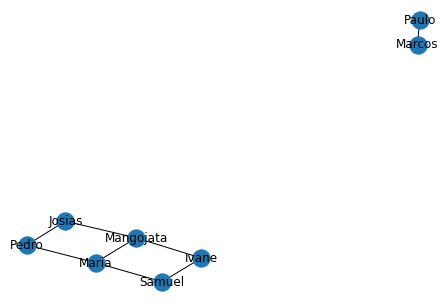

In [7]:
test('https://pastebin.com/raw/fa3ZNXtz')

Numero de familias:

3


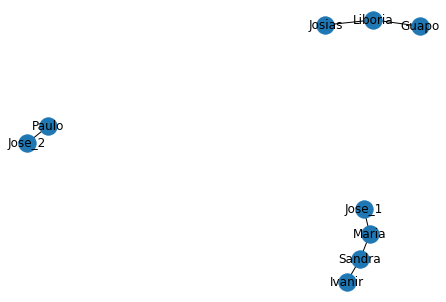

In [8]:
test('https://pastebin.com/raw/99PbjZr4')